<a href="https://colab.research.google.com/github/richeym-umich/workshops/blob/main/Advanced_Machine_Learning_Topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Classification**

The following is an example of a classification application using the K nearest neighbors classifier in the scikit learn package

In [ ]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Assigning features and label variables
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [ ]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [ ]:
# converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

In [ ]:
#combining weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded))

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Should the team play in these conditions?: " + str(le.inverse_transform(predicted)))

Should the team play in these conditions?: ['Yes']


LabelEncoder()

### **Reinforcement Learning**



The following is an example of a reinforcement learning application. The functions are predefined, and we will step through running each part of the code

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

First, we define a list of points by their connections

In [ ]:
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

Next, we add the points to a graph and visualize the graph

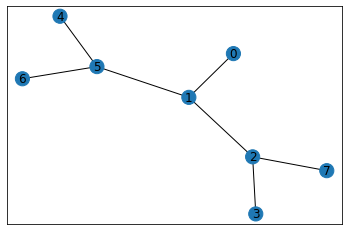

In [ ]:
goal = 7
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()

Next, we create our reward matrix

In [ ]:
MATRIX_SIZE = 8

#create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

#assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point]=0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        R[point[::-1]] = 0

R[goal,goal] = 100

Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


Set our learning parameter

In [ ]:
#learning parameter
gamma = 0.8

Function to find our available actions from our current state

In [ ]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

Function to choose our next action from our current state and available actions

In [ ]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act, 1))
    return next_action

Function to update the state of our actor with our chosen action

In [ ]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)

    max_value = Q[action, max_index]

    Q[current_state,action] = R[current_state, action] + gamma*max_value

    if(np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return(0)

Now that our code has been set up, we need to train our reinforcement learning model

In [ ]:
#Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)

print("Trained Q matrix: ")
print(Q/np.max(Q)*100)

Trained Q matrix: 
[[  0.          63.99999998   0.           0.           0.
    0.           0.           0.        ]
 [ 51.19999998   0.          79.99999997   0.           0.
   51.19999998   0.           0.        ]
 [  0.          63.99999973   0.          63.99999998   0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.19999998   0.           0.        ]
 [  0.          63.99999998   0.           0.          40.95999998
    0.          40.95999998   0.        ]
 [  0.           0.           0.           0.           0.
   51.19999998   0.           0.        ]
 [  0.           0.          79.99999997   0.           0.
    0.           0.          99.99999998]]


Finally, we test our model and output the learning results

Most efficient path: 
[0, 1, 2, 7]


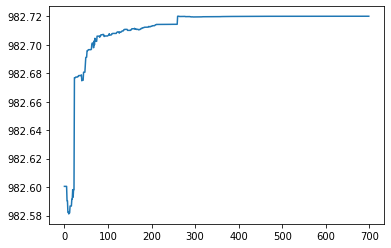

In [ ]:
#Testing
current_state=0
steps = [current_state]

while current_state != 7:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index
print("Most efficient path: ")
print(steps)

plt.plot(scores)
plt.show()

In [2]:
import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
import numpy as np

url = 'https://raw.githubusercontent.com/richeym-umich/workshops/main/basketball_data.csv'
df = pd.read_csv(url)
df.head()


,Player,GP,GS,PTS,FGM,FGA,FTM,FTA,3FGM,3FGA,OREB,DREB,AST,STL,BLK,TO,PF
0,1,16,14,13,4,4,5,9,0,6,10,13,3,7,9,10,0
1,2,172,139,26,12,9,2,7,0,9,26,5,14,9,3,6,0
2,3,168,72,6,3,14,0,5,0,5,25,12,1,1,5,0,5
3,4,175,84,22,4,8,14,19,0,10,23,10,8,7,13,7,4
4,5,169,46,1,0,15,1,5,0,8,22,30,10,0,19,4,0


In [23]:
X_std = StandardScaler().fit_transform(df)

# Run local implementation of kmeans
km = KMeans(n_clusters=5, max_iter=300)
km.fit(X_std)
label = km.fit_predict(X_std)

In [29]:
#Getting unique labels
import matplotlib.pyplot as plt

df['label'] = label

df.head()
#plotting the results
#plt.scatter(numbers[:,0] , filtered_label0[:,1])
#plt.show()

,Player,GP,GS,PTS,FGM,FGA,FTM,FTA,3FGM,3FGA,OREB,DREB,AST,STL,BLK,TO,PF,label
0,1,16,14,13,4,4,5,9,0,6,10,13,3,7,9,10,0,4
1,2,172,139,26,12,9,2,7,0,9,26,5,14,9,3,6,0,0
2,3,168,72,6,3,14,0,5,0,5,25,12,1,1,5,0,5,0
3,4,175,84,22,4,8,14,19,0,10,23,10,8,7,13,7,4,2
4,5,169,46,1,0,15,1,5,0,8,22,30,10,0,19,4,0,0


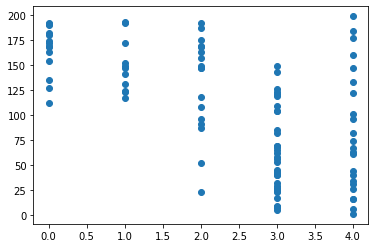

In [33]:
plt.scatter(df['label'], df['GP'])
plt.show()

In [13]:
X=df.iloc[:, [1,4]].values
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  called y K-means
y_kmeans = kmeans.fit_predict(X)

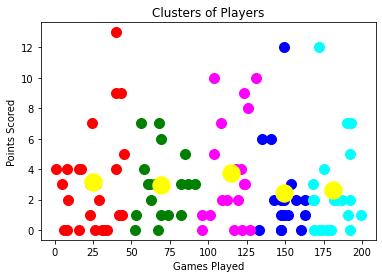

In [14]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Players')
plt.xlabel('Games Played')
plt.ylabel('Points Scored')
plt.show()

### Detecting Parkinsons Disease

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from skimage import feature
from imutils import build_montages
from imutils import paths
import numpy as np
import argparse
import cv2
import os

In [17]:
def quantify_image(image):
  features = feature.hog(image, orientations=9, pixels_per_cell=(10,10), cells_per_block=(2,2), transform_sqrt=True, block_norm="L1")
  return features

def load_split(path):
  imagePaths = list(paths.list_images(path))
  data = []
  labels = []

  for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (200,200))

    image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    features = quantify_image(image)
    data.append(features)
    labels.append(label)

  return (np.array(data), np.array(labels))

In [18]:
#ARG PARSING HERE
datasetPath = ''


In [ ]:
trainingPath = os.path.sep.join([datasetPath, 'training'])
testingPath = os.path.sep.join([datasetPath, 'testing'])
print('[INFO] loading data...')
(trainX, trainY) = load_split(trainingPath)
(testX, testY) = load_split(testingPath)